   
  # Introducción a Redes Neuronales Convolucionales (ConvNet o CNN)

<font size=4 color='rosybrown'>
    
 
> ## Aplicaciones

<font size=4>
Las principales aplicaciones para las CNN son:

- **Clasificación de imágenes** ---> identifica si hay un objeto en la imagen.


<img src="https://drive.google.com/uc?id=1Dc77Te0xT--X9txhKV4HhJ3_pCxhIm0p" align = "center" >

- **Detección de objetos** ---> identifica un objeto y su posición. 

<img src="https://drive.google.com/uc?id=1XkYx4OQBYIVCpne_KOd-sbkb0J2pc8sx" align = "center" >

- **Neural Style Transfer** ---> se juntan un par de imágenes: una de contenido y otra de estilo.


<img src="https://drive.google.com/uc?id=1OFxIvvYC46vL3PjxcT0nZewWlcai2kK-" align = "center" >

    
[AI artist](https://aiartists.org/ai-generated-art-tools)


   
 
> # Introducción

<font size=4>   
Las redes neuronales normales podrían funcionar bien con imágenes pequeñas. Por ejemplo, las imágenes con un tamaño de 32x32x3 (32 canales de ancho, 32 de alto, 3 colores), una sola neurona completamente conectada en una primera capa oculta de una red neuronal regular tendría 32 * 32 * 3 = 3072 pesos y podría ser manejable. Sin embargo, una imagen de gran tamaño, por ejemplo 200x200x3, conduciría a neuronas que tienen 200 * 200 * 3 = 120,000 pesos. Claramente, esta conectividad total es un desperdicio y la gran cantidad de parámetros conduciría rápidamente a sobreajuste.


<img src="https://drive.google.com/uc?id=1vXwsb3WAhvCH3KmuLMXWL-QRLXaDSvZs" align = "center" >

<font size=4>Los requisitos computacionales y los requisitos de memoria para entrenar una red neuronal con miles de millones de parámetros es poco viable. 


<font size=4>En particular, a diferencia de una red neuronal normal, las capas de una CNN tienen neuronas dispuestas en más dimensiones:

- 2D: ancho, alto

- 3D: ancho, alto, profundidad

<font size=4>Una CNN simple es una secuencia de capas, y cada capa de una CNN transforma un volumen de activaciones en otro a través de una función diferenciable. 

<font size=4>Básicamente, se utilizan tres tipos principales de capas para construir arquitecturas CNN: 

1. Capa convolucional,


2. Capa de agrupación y 


3. Capa totalmente conectada. 

<font size=4>Todas estas capas se apilan para formar una arquitectura CNN completa. 



> # 1. Capa convolucional


<font size=4>**La capa convolucional usa una serie de filtros para extraer las caracteristicas de los datos de entrada.**

>> # 1.1 Convolución


<font size=4>Se realiza una operacion de convolución entre los filtros y las entradas. 

<img src="https://drive.google.com/uc?id=15nZxBV3duwDDrT6T4zT5W1qHEZSFP-Qy" align = "center" >


<font size=4>El recuadro inicial corresponde a los datos de entrada, en el caso de una imagen, cada valor correspondería a un valor de pixel. 

<font size=4>El recuadro de en medio es el filtro o kernel y el ultimo recuadro es el resultado de realizar la operación de convolucion entre la imagen y el filtro.

<font size=4>El filtro se superpone con la imagen iniciando en la esquina superior izquierda, los valores superpuestos se multiplican y finalmente se suman. Por ejemplo, para obtener el primer valor de la convolución se realizó la siguiente operación:

$$0(-1)+0(-2)+75(-1)+0(0)+75(0)+80(0)+0(1)+75(2)+80(1) = 155$$

<font size=4>Posteriormente, el filtro se recorre un lugar a la derecha y se realiza el mismo procedimiento. Una vez que el filtro queda en la esquina superior derecha, se baja un lugar y comienza de nuevo en la izquierda, como se muestra en la imagen anterior.


<font size=4>En el siguiente ejemplo, se ilustra cómo es que un filtro extrae características de las entradas, por ejemplo, si la entrada es una imagen, entonces para detectar rectas verticales en ella se usa el siguiente filtro:


<img src="https://drive.google.com/uc?id=1NpvcfOj6iJP2e-3CoKtxvll8KCQFfyB0" align = "center" >

<font size=4>Los colores oscuros corresponden a intensidades bajas.


<font color='cornflowerblue'>

<font size=4 color='cornflowerblue'>NOTA

<font size=4 color='cornflowerblue'>No se requiere seleccionar los números que definen al filtro, tal vez puedan aprenderse y tratar  a los números como parámetros (en partícular, pesos).

  
    
>>  # 1.2 Padding

<font size=4>Es una modificación que comunmente se aplica a la imagen antes de realizar la operación de convolución. 


<img src="https://drive.google.com/uc?id=1rLh5CFe6dsmOuwnK88v0NVCH5mwmT86Z" align = "center">


<font size=4>Si se tiene una imagen de entrada de tamaño nxn y se aplica la operacion de convolución con un filtro de tamaño fxf, entonces la imagen resultante sera de tamaño (n-f+1)x(n-f+1).

<font size=4>De la operación de convolución tenemos dos observaciones:

1. La imagen se encoge rapidamente por lo que la aplicación de la convolución se podría realizar pocas veces.


2. Los pixeles de los extremos se usan una sola vez para calcular la salida por lo que se pierde información cerca de los bordes de la imagen. 

<font size=4>Una manera de resolver los problemas generados por las dos observaciones anteriores es agregar una columna o renglón (según sea el caso) en cada uno de sus extremos de la imagen inicial, cada valor de pixel en esa orilla agregada es cero:

<img src="https://drive.google.com/uc?id=14sSdGetsP_CXIxMjcKW_SvZ-RxMmBy_e" align = "center" >

<font size=4>La técnica de padding se divide en dos tipos:

1. Valid

<font size=4>Lo que significa que NO se agrega nada a la imagen inicial, es decir, se aplica la operación de convolución sin antes modificar la imagen de entrada, no se realiza padding.

2. Same

<font size=4>Se agregan un 'padd para que el tamaño de salida sea el mismo que el tamaño de entrada:


$$n+2p-f+1 = n \rightarrow p = \dfrac{f-1}{2}$$

<font size=4>Comunmente, el tamaño de los filtros es impar, una de las razones es que si se aplica padding, entonces p es simétrico. 

    
>>  # 1.3 Stride

<font size=4>El paso (s) en que se desplaza el filtro para lo operación de convolución es elegible, por defecto es uno. 

<font size=4>A continuación se muestra un ejemplo con s = 2:


<img src="https://drive.google.com/uc?id=1Ak6sIgePUsQF4mYMuQsmBrq03KcWuaw3" align = "center" >

<font size=4>En este caso para calcular las dimensiones de la salida, se usa la siguiente expresión:

$$\lfloor \dfrac{n+2p-f}{s}+1\rfloor x \lfloor\dfrac{n+2p-f}{s}+1\rfloor$$

   
    
>  # Convolución en 3D

<font size=4>Si ahora se quiere aplicar la convolucion a imágenes a color, es decir, con los canales RGB, entonces el filtro a aplicar debe tener el mismo número de canales (profundidad). 

<font size=4>En el siguiente ejemplo se tiene una imagen de 6x6x3, el primer numero corresponde al ancho, el segundo a lo largo y el tercero a la profundidad o número de canales. Así el filtro a aplicar debe cumplir que es de la forma fxfx3. El resultado después de aplicar la convolución es de tamaño 4x4x1. 


<img src="https://drive.google.com/uc?id=1uNG0DKtNBGxbdvxWeR4HnzLF1jbCrd5G" align = "center" >


<font size=4>Suponiendo que estamos interesados en detectar las lineas verticales del canal rojo, entonces el filtro que aplicariamos es el correspondiente a la detección de lineas verticales en el canal rojo R y ceros en los otros dos canales: verde y azul, como se muestra a continuación:

<img src="https://drive.google.com/uc?id=1X2NL4GJDkSVJ4-gXmu-vglDfloIGLeMC" align = "center" >


<font size=4 color='rosybrown'>
    
    
>  # Convolución multiple

<font size=4>Se puede aplicar más de un filtro a la vez. Por ejemplo, el primer filtro podría ser para detectar lineas verticales, y podriamos aplicar un segundo filtro para detectar lineas horizontales.

<font size=4>En este caso, cada filtro se aplica como en el caso descrito arriba, y tendriamos dos salidas de 4x4, lo que se hace es apilar estas salidas formando un volumen resultante de 4x4x2.


<img src="https://drive.google.com/uc?id=1OkFTlNXBQ4a-x64NSfxQR_KW5FWKxQcj" align = "center" >

<font size=4>El número de filtros aplicados determina la profundidad de la salida. 


<font size=4>Resumiendo, si tenemos una entrada con dimensiones $nxnxn_c$ (con $n_c$ el número de canales) y un filtro de dimensiones $fxfxn_c$, el resultado al aplicar la convolución con los $n_c´$ filtros es $(n-f+1)x(n-f+1)xn_c´$, aquí se esta suponiendo que p=0 y s = 1.

   
    
>  # Convolución como una capa

<font size=4>La entrada de una red neuronal, es decir, el conjunto de rasgos que define el numero de nodos en la capa de entrada se denota con $x = a^{[0]}$, en una red neuronal convencional, lo que se hace es la combinacion lineal entre $a^{[0]}$ y la matriz de pesos definida entre las capas de entrada y la capa oculta 1: $w^{[1]}$ y el bias asociado a esa capa $b^1$:

$$z^{[1]} = w^{[1]}a^{[0]}+b^{[1]}$$


<font size=4>y para obtener la salida de la capa 1, es decir, los valores $a^{[1]}$ que entraran a la siguiente capa para hacer un procedimiento analogo al descrito anteriormente, se aplica una funcion de activación:

$$a^{[1]} = f(z^{[1]})$$


<img src="https://drive.google.com/uc?id=1iqua53Bve0W059rwBjLEfYcKFY4Imquk" align = "center" >


<font size=4>En la siguiente imagen se muestra la analogía entre el proceso para calcular las salidas de una capa usando una capa convolucional:

<img src="https://drive.google.com/uc?id=1MK2DceW9RG_szmycc5-KOevntJv8S5Fw" align = "center" >

<font size=4>En este ejemplo, la cantidad de parametros a entrenar es de 2(3x3x3+1), pues se aplican dos filtros de 3x3x3, que juegan el papel de los pesos y sumamos el parametro del bias. 

<font size=4>Algo importante a notar es que no importa qué tan grande sea la imagen de entrada, la cantidad de parámetros es fija. 

<font size=4>**Ejercicio**

<font size=4>Si aplicas 10 filtros de 3x3x3 en una capa de una red neuronal, ¿Cuántos parámetros (pesos y bias) hay en esa capa?



    
> # Ejemplos de aplicación de filtros


  
  <font size=4 color='black'>
  
  Scipy es una librería para el procesamiento de imágenes, entre otras muchas cosas.
  
  [scipy](https://www.scipy.org/)
  
  scipy.misc.ascent(): Get an 8-bit grayscale bit-depth, 512 x 512 derived image for easy use in demos.
  
  Imagen antes de aplicar el filtro:

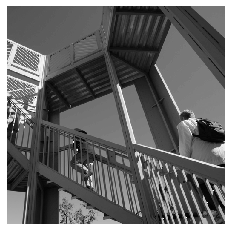

In [ ]:
from scipy import misc
import numpy as np

i = misc.ascent()

import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i);

In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

<font size=4>Definición de filtros:

In [ ]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight lines.

#Experiment with different values for fun effects.

#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!

#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filter = [ [1, 0, -1], [1, 0, -1], [1, 0, -1]]
#filter = [ [1, 1, 1], [0, 0, 0], [-1, -1, -1]]


<font size=4>Operación de convolución:

In [ ]:
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x + 1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution 
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        i_transformed[x, y] = convolution

<font size=4> Imagen después de aplicar el filtro:

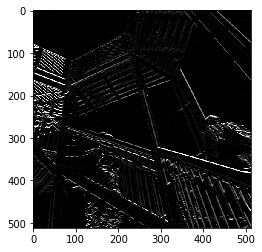

In [ ]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.axis('on')
plt.show() 

<font size=4>  
  **Ejercicio**
  
<font size=4>Aplicar algún otro filtro a la imagen anterior.


> # 2. Pooling layer

<font size=4>Para reducir las dimensiones de la entrada se usan las capas de agrupación, para ello se obtiene el promedio o máximo de un conjunto de valores.

<img src="https://drive.google.com/uc?id=1qxtk0UAQbg8Mn84_PtAYeoajjyzB2nUr" align = "center" >

<font size=4>Una propiedad interesante del máximo agrupamiento es que tiene un conjunto de hiperparámetros, pero no tiene parámetros que aprender.

<font size=4>Una vez que fijes f y s, es sólo un cálculo fijo y el descenso de gradiente no cambia nada.

<font size=4>Otro tipo de capa de agrupamiento es average pooling, que en lugar de calcular el máximo calcula el promedio. 


<font size=4>Si tiene una entrada 3D, entonces las salidas tendrán la misma dimensión, la forma en que se calcula el máximo agrupamiento es realizar el cálculo que acabamos de describir en cada uno de los canales de forma independiente. El cálculo del máximo agrupamiento se realiza independientemente en cada uno de estos $n_c$ canales.

<font size=4>**En este tipo de capa no hay parametros para aprender, solo se fijan los hiperparametros: s, f y el tipo de capa de agrupamiento.**




    
 > # Capa totalmente conectada

<font size=4>Finalmente se tiene la capa fully-connected (FC), que es como las que se han trabajado hasta ahora, un conjunto de nodos que estan totalmente conectados con los nodos de la capa anterior.


<font size=4>**Ejemplo de una CNN**


<img src="https://drive.google.com/uc?id=16AF2tpJxzXUT7NdlUXHzXC1MumGNsXJb" align = "center" >


<font size=4>**Ejercicio**

<font size=4>Completa la siguiente tabla:

| Layer | Activation shape | Activation size | # parameters |
| --- | --- | --- | --- |
| input | (32, 32, 3) | 3072 | 0 |
| conv1(f=5, s=1, 8filters) | --- | --- | --- |
| pool1(f=2, s=2) | --- | --- | --- |
| conv2(f=5, s=1, 16filters) | --- | --- | --- |
| pool2(f=2, s=2) | --- | --- | --- |
| FC3 | (120,1) | --- | --- |
| FC4 | (84,1) | --- | --- |
| Softmax | (10, 1) | --- | --- |